In [1]:
# وجب دراسة المشروع السابق=
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# تحميل البيانات من الموقع مباشرةً
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:05<00:00, 159MB/s]
100% 715M/715M [00:05<00:00, 140MB/s]


In [3]:
# إستخراج الملفات 
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [5]:
# تثبيت مكتبة لإستخراج الملفات 
!pip install py7zr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.0/379.0 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.2 MB/s eta 0:00:00


In [6]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
# الحصول على أسماء الملفات في المجلد
filenames = os.listdir('/content/train')

In [9]:
len(filenames)

50000

In [10]:
print(filenames[0:5])
print(filenames[-5:])

['33182.png', '4866.png', '10650.png', '41503.png', '22957.png']
['14453.png', '22218.png', '20488.png', '25565.png', '2521.png']


In [11]:
label_df = pd.read_csv('/content/trainLabels.csv')

In [12]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [13]:
#id: من خلالها نعرف ما هي الصورة
label_df[label_df['id']== 7796]

,id,label
7795,7796,frog


In [14]:
label_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [15]:
label_df['label'].unique().tolist()

['frog',
 'truck',
 'deer',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'dog',
 'airplane']

In [16]:
# طبعا لقد أنشت القاموس إعتمادا على محتوى قناة اليوتيوب الذي تعلمت منه 
label_dic = {'frog':6,'truck':9,'deer':4,'automobile':1,'bird':2,'horse':7,'ship':8,'cat':3,'dog':5,'airplane':0}


In [17]:
labels = label_df['label'].map(label_dic).tolist()

In [18]:
labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [19]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


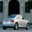

In [20]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/33182.png') # تحويل الصورة الى مصفوفة 

cv2_imshow(img) # إظهار المصفوفة على بهيئة صورة 

In [22]:
# نحتاج هذه القائمة للإشارة الى أسم الصورة 
id_list = list(label_df['id'])

In [23]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [27]:
train_data_folder = '/content/train/'
# هذه القائمة سوف تحوي الصور حيث الصورة عبارة عن مصفوفة 
# قائمة مصفوفات == قائمة صور
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [28]:
type(data)

list

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(32, 32, 3)

In [31]:
X = np.array(data)
y = np.array(labels)

In [33]:
X.shape,y.shape

((50000, 32, 32, 3), (50000,))

In [36]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
# تحجيم البيانات 
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
# إنشاء الشبكة العصبونية
num_of_class = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_class,activation='softmax')])

In [43]:
# تجميع الشبكة العصبونية 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [44]:
# تركيب النموذج
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 2.0189 - acc: 0.2426 - val_loss: 1.9379 - val_acc: 0.2665
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8999 - acc: 0.2895 - val_loss: 1.9258 - val_acc: 0.2865
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8684 - acc: 0.3102 - val_loss: 1.8685 - val_acc: 0.3190
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8542 - acc: 0.3183 - val_loss: 1.8392 - val_acc: 0.3282
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8445 - acc: 0.3259 - val_loss: 1.8338 - val_acc: 0.3370
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8366 - acc: 0.3291 - val_loss: 1.8230 - val_acc: 0.3277
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8307 - acc: 0.3335 - val_loss: 1.8205 - val_acc: 0.3345
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [48]:
# تحميل ما نحتاجه لتطبيق نموذج :resnet
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense ,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import  ResNet50
from tensorflow.keras import optimizers

In [52]:
# ResNet شبكة عصبونية إلتفافية ب 50 طبقة 
# صراحة لم أبحث كثيراً في الموضوع
convolutional_base =ResNet50(include_top=False,input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [59]:
num_of_class = 10

model = models.Sequential() # إنشاء شبكة عصبونية فارغة
model.add(layers.UpSampling2D((2,2))) # لدينا بعد الصورة 32 نضرب ب2 تصبح 64
model.add(layers.UpSampling2D((2,2))) # لدينا بعد الصورة 64 نضرب ب 2 تصبح 128 
model.add(layers.UpSampling2D((2,2))) # لدينا بعد الصورة 128 نضرب ب2 تصبح 256 
model.add(convolutional_base) # إضافة النموذج الإلتفافي 
model.add(layers.Flatten()) # تحويل المصفوفة الى شعاع إن صح التعيبر
model.add(layers.BatchNormalization()) # لجعل البيانات في حجم مشترك
model.add(layers.Dense(128,activation='relu')) 
model.add(layers.Dropout(0.5))#  نقوم بتسريب بعض العصبونات اي نتجاهل وجودها overfitingكي لا ينتج لدينا 
model.add(layers.BatchNormalization()) 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_class,activation='softmax')) 



In [61]:
# لقد تم تغير معامل الأمثلي وجب تجريب دراسة كل المفاهيم الرياضية يتطلب وقت وجهد
model.compile(optimizer=optimizers.RMSprop(),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [63]:
# Google colabطبعا وجب المرور من الشبكة العصبونية 10 مرات للحصول على النتائج المرغوبة لكن ذلك يحتاج ما يقارب الساعة على
history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=3)
# validation_split : جزء من البيانات للتقيم 

Epoch 1/3
1125/1125 [==============================] - 485s 431ms/step - loss: 1.5887 - acc: 0.4236 - val_loss: 1.2797 - val_acc: 0.5368
Epoch 2/3
1125/1125 [==============================] - 479s 426ms/step - loss: 1.3192 - acc: 0.5373 - val_loss: 1.6489 - val_acc: 0.4638
Epoch 3/3
1125/1125 [==============================] - 484s 431ms/step - loss: 1.1654 - acc: 0.5992 - val_loss: 1.1552 - val_acc: 0.5980


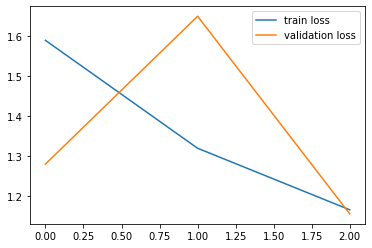

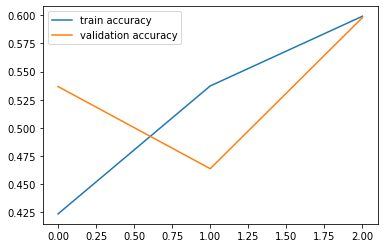

In [65]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()